# Projekt - `Eksploracyjna analiza danych`

### Michalina Matuszak
#### *Uniwersytet Technologiczno-Przyrodniczy*

    Cel projektu:
    1. Dokonać szczegółowej, eksploracyjnej analizy danych
    2. Zbadać w jaki sposób wykrywać fakt, że temperatura może wzrosnąć o zadany poziom
    3. Przewidzieć fakt, że temperatura może wzrosnąć powyżej zadanego poziomu.
    4. Zaproponować rozwiązanie, które poprawi parametry.


In [1]:
#import bibliotek
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from functools import reduce
import scipy

### Import wszystkich plikow CSV:

In [2]:
#temperatura
t_gabinet = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Temperatura_Gabinet.csv')
t_gsypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Temperatura_GlownaSypialnia.csv')
t_hol = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Temperatura_Hol.csv')
t_lazienka = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Temperatura_LazienkaGorna.csv')
t_salon = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Temperatura_Salon.csv')
t_sypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Temperatura_Sypialnia.csv')
t_zew = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/TemperaturaZewnetrzna.csv')

In [3]:
#grzejniki
g_gabinet = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Grzejnik_Gabinet.csv')
g_gsypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Grzejnik_Glowna_Sypialnia.csv')
g_lazienka = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Grzejnik_LazienkaGorna_Podlogowka.csv')
g_hol = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Grzejnik_Parter_Podlogowka.csv')
g_salon = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Grzejnik_Salon.csv')
g_sypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Grzejnik_Sypialnia.csv')
g_blokada_kotla = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Grzejnik_BlokadaKotlaCO.csv')

In [4]:
#set-pointy
sp_gabinet = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Setpoint_Gabinet.csv')
sp_gsypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Setpoint_GlownaSypialnia.csv')
sp_hol = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Setpoint_Hol.csv')
sp_lazienka = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Setpoint_LazienkaGorna.csv')
sp_salon = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Setpoint_Salon.csv')
sp_sypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Setpoint_Sypialnia.csv')

In [5]:
#tryby
tryb_gabinet = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Tryb_Gabinet.csv')
tryb_gsypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Tryb_GlownaSypialnia.csv')
tryb_hol = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Tryb_Hol.csv')
tryb_lazienka = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Tryb_LazienkaGorna.csv')
tryb_salon = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Tryb_Salon.csv')
tryb_sypialnia = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Tryb_Sypialnia.csv')

In [6]:
#zewnetrzne
blok_g = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/Centralne_BlokadaOgrzewania.csv')
cis_atm = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/CisnienieAtmosferyczne.csv')
czujnik_deszczu = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/EGardenCzujnikDeszczu.csv')
wiglotnosc = pd.read_csv('C:/Users/MSI-PC/WDUM/Eksploracyjna/dane/WilgotnoWzglendna.csv')

### Obróbka danych

**Lista zawierająca nazwy wszystkich DataFrames załadowanych do pamięci**

In [7]:
list = []
list = %who_ls DataFrame

**Zmiana formatu czasu każdej DataFrame załadowanej do pamięci**

In [8]:
#for x in list:
#    globals()[x]['time']=pd.to_datetime(globals()[x]['time']).astype('datetime64[s]')

**Zaokrąglanie do jednego miejsca po przecinku wartosci temperatur**

In [9]:
for x in list:
    globals()[x]['value'].round(decimals=1)

**Usuwanie niepotrzebnych spacji z nazwy kolumny (bo był problem z komendą del)**

In [10]:
for x in list:
    globals()[x].columns =  globals()[x].columns.str.strip()

**Usuwanie kolumny name**

In [11]:
for x in list:
    del globals()[x]['name']

**Zmiana nazwy kolumny wartości (zeby bylo wiadomo po późniejszym łączeniu tabel ktore wartosci są z którego pliku)**

In [12]:
for x in list:
    globals()[x].rename(columns={'value': x}, inplace=True)

**Łączenie wartości temperatury w jeden dataframe**

In [13]:
#głównie po to, aby zobaczyć czy istnieją jakieś zależności pomiędzy poszczególnymi pokojami
#zbadać czy wartosci temperatur nie odbiegają za bardzo od siebie
#po połączeniu w jeden DataFrame wartości odpowiadają sobie wzajemnie wzgledem czasu

t_list = [t_gabinet,t_gsypialnia,t_hol,t_lazienka,t_salon,t_sypialnia]
left = t_zew
for i in t_list:
    right= i
    temp_df = pd.merge_asof(left,right,on=['time'])
    left = temp_df

**Tabela korelacji:**

In [14]:
temp_df_correlation=temp_df.corr()
temp_df_correlation

,time,t_zew,t_gabinet,t_gsypialnia,t_hol,t_lazienka,t_salon,t_sypialnia
time,1.000000,-0.784574,-0.087507,-0.366536,-0.089271,0.020212,-0.161204,-0.216211
t_zew,-0.784574,1.000000,0.147002,0.379454,0.170891,0.099383,0.193536,0.302012
t_gabinet,-0.087507,0.147002,1.000000,0.549522,0.656367,0.772316,0.649485,0.772044
t_gsypialnia,-0.366536,0.379454,0.549522,1.000000,0.512856,0.469121,0.550314,0.726729
t_hol,-0.089271,0.170891,0.656367,0.512856,1.000000,0.690434,0.783320,0.745247
t_lazienka,0.020212,0.099383,0.772316,0.469121,0.690434,1.000000,0.615483,0.724650
t_salon,-0.161204,0.193536,0.649485,0.550314,0.783320,0.615483,1.000000,0.749787
t_sypialnia,-0.216211,0.302012,0.772044,0.726729,0.745247,0.724650,0.749787,1.000000


**Heatmapa korelacji**

<AxesSubplot:>

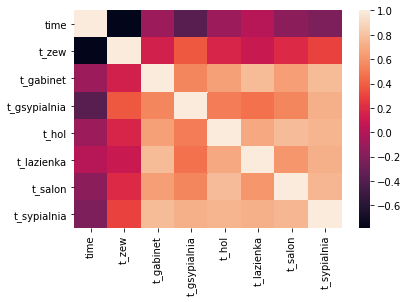

In [15]:
sns.heatmap(temp_df_correlation)

**Wymiarowość**

In [16]:
temp_df.shape

(14165, 8)

**Czy są wartosci NaN**

In [17]:
temp_df.isnull().sum()

time            0
t_zew           0
t_gabinet       0
t_gsypialnia    0
t_hol           0
t_lazienka      0
t_salon         0
t_sypialnia     0
dtype: int64

**Wartosci statystyczne**

In [18]:
temp_df.describe()

#t_zew na pewno ma jakąś błędną odstającą wartość

,time,t_zew,t_gabinet,t_gsypialnia,t_hol,t_lazienka,t_salon,t_sypialnia
count,1.416500e+04,14165.000000,14165.000000,14165.000000,14165.000000,14165.000000,14165.000000,14165.000000
mean,1.605698e+18,5.514211,21.639463,21.820409,22.008097,22.093893,21.654169,22.227314
std,2.947339e+15,6.389213,0.463784,0.408050,0.404057,0.560762,0.366104,0.447026
min,1.601155e+18,-3.500000,19.400000,19.800000,20.300000,20.000000,18.500000,20.400000
25%,1.603119e+18,0.300000,21.400000,21.600000,21.700000,21.800000,21.500000,22.000000
50%,1.605501e+18,5.500000,21.800000,21.800000,22.100000,22.200000,21.700000,22.300000
75%,1.608245e+18,9.700000,22.000000,22.000000,22.300000,22.400000,21.900000,22.500000
max,1.611226e+18,190.300000,23.000000,23.000000,23.100000,26.600000,24.500000,23.700000


**Boxplot**

**Jak widać na poniższym diagamie - występują wartości odbiegające**

<AxesSubplot:>

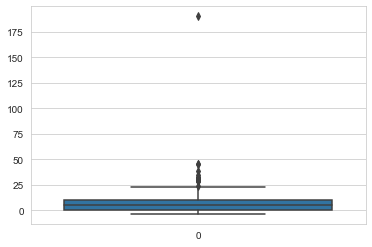

In [19]:
sns.set_style("whitegrid")
sns.boxplot(data=temp_df['t_zew'])

**Podstawowe informacje statystyczne**

In [20]:
temp_df.describe()

,time,t_zew,t_gabinet,t_gsypialnia,t_hol,t_lazienka,t_salon,t_sypialnia
count,1.416500e+04,14165.000000,14165.000000,14165.000000,14165.000000,14165.000000,14165.000000,14165.000000
mean,1.605698e+18,5.514211,21.639463,21.820409,22.008097,22.093893,21.654169,22.227314
std,2.947339e+15,6.389213,0.463784,0.408050,0.404057,0.560762,0.366104,0.447026
min,1.601155e+18,-3.500000,19.400000,19.800000,20.300000,20.000000,18.500000,20.400000
25%,1.603119e+18,0.300000,21.400000,21.600000,21.700000,21.800000,21.500000,22.000000
50%,1.605501e+18,5.500000,21.800000,21.800000,22.100000,22.200000,21.700000,22.300000
75%,1.608245e+18,9.700000,22.000000,22.000000,22.300000,22.400000,21.900000,22.500000
max,1.611226e+18,190.300000,23.000000,23.000000,23.100000,26.600000,24.500000,23.700000


**Resetowanie indexu**

In [21]:
temp_df.reset_index(drop=True, inplace=True)

**Zmiana nieprawidłowych wartości w danych**

In [22]:
for i in range(3100,3250):
    temp_df.at[i,'t_zew'] = 7.5
    t_zew.at[i,'t_zew'] = 7.5

**Boxplot po poprawkach:**

<AxesSubplot:>

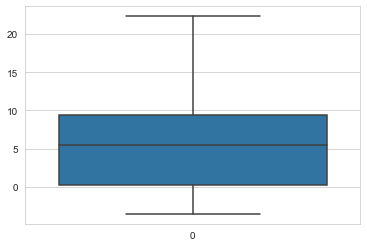

In [23]:
sns.boxplot(data=temp_df['t_zew'])

**Łączenie do jednego DataFrame wszystkich danych pochodzenia zewnętrznego**

In [24]:
inne_list = [t_zew,cis_atm,czujnik_deszczu,wiglotnosc]
left = blok_g
for i in inne_list:
    right= i
    inne_df = pd.merge_asof(left,right,on=['time'])
    left = inne_df


**Łączymy dataframe ze zbiorem wszystkich temperatur pokoju z dataframem o czynnikach zewnętrznych**

In [25]:
left= temp_df
right = inne_df
temp_inne_df = pd.merge_asof(left,right,on=['time'])
temp_inne_df=temp_inne_df.apply(pd.to_numeric, errors='coerce')
temp_inne_df.dropna(axis=0, inplace=True)
temp_inne_df.reset_index(drop=True, inplace=True)

**Czy są wartosci NaN**

In [26]:
temp_inne_df.isnull().sum()

time               0
t_zew_x            0
t_gabinet          0
t_gsypialnia       0
t_hol              0
t_lazienka         0
t_salon            0
t_sypialnia        0
blok_g             0
t_zew_y            0
cis_atm            0
czujnik_deszczu    0
wiglotnosc         0
dtype: int64

**Korelacja temperatur wszystkich pomieszczeń z czynnikami zewnętrznymi**

In [27]:
temp_inne_df_corr=temp_inne_df.corr()
temp_inne_df_corr

,time,t_zew_x,t_gabinet,t_gsypialnia,t_hol,t_lazienka,t_salon,t_sypialnia,blok_g,t_zew_y,cis_atm,czujnik_deszczu,wiglotnosc
time,1.000000,-0.836161,-0.082564,-0.360576,-0.087478,0.017436,-0.155817,-0.211868,-0.484149,-0.836179,0.092343,-0.042455,0.557839
t_zew_x,-0.836161,1.000000,0.156450,0.409332,0.171316,0.103905,0.209135,0.323303,0.542806,0.998923,-0.212565,0.054193,-0.609472
t_gabinet,-0.082564,0.156450,1.000000,0.546812,0.656308,0.776688,0.647807,0.771079,-0.100881,0.157298,-0.000056,0.106844,-0.040809
t_gsypialnia,-0.360576,0.409332,0.546812,1.000000,0.513526,0.476632,0.546711,0.725509,0.132629,0.409698,-0.086328,0.021129,-0.226065
t_hol,-0.087478,0.171316,0.656308,0.513526,1.000000,0.691974,0.783988,0.745482,-0.094778,0.170941,0.043230,0.066203,-0.050881
t_lazienka,0.017436,0.103905,0.776688,0.476632,0.691974,1.000000,0.620364,0.729008,-0.228419,0.102235,0.093407,0.137356,0.047415
t_salon,-0.155817,0.209135,0.647807,0.546711,0.783988,0.620364,1.000000,0.748563,-0.042089,0.210773,0.022618,0.104563,-0.110760
t_sypialnia,-0.211868,0.323303,0.771079,0.725509,0.745482,0.729008,0.748563,1.000000,0.045300,0.324234,-0.048189,0.107287,-0.156320
blok_g,-0.484149,0.542806,-0.100881,0.132629,-0.094778,-0.228419,-0.042089,0.045300,1.000000,0.543791,-0.250424,0.006760,-0.675416
t_zew_y,-0.836179,0.998923,0.157298,0.409698,0.170941,0.102235,0.210773,0.324234,0.543791,1.000000,-0.212806,0.054617,-0.611115


**Heatmapa korelacji temperatur wszystkich pomieszczeń z czynnikami zewnętrznymi**

<AxesSubplot:>

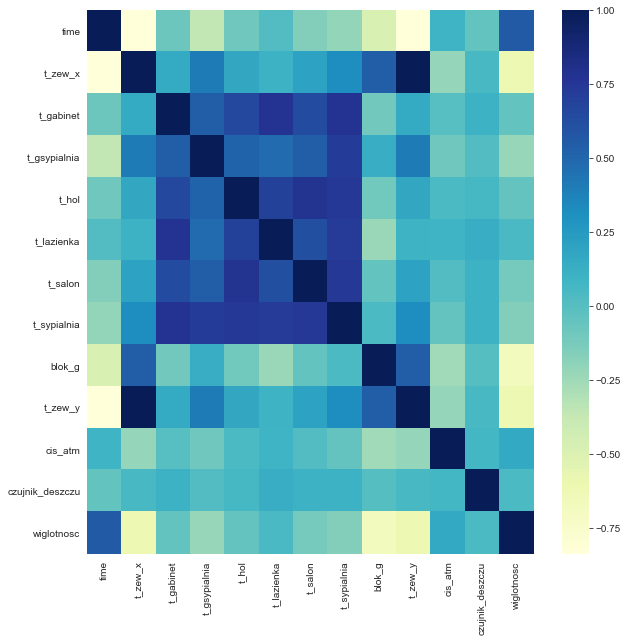

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(temp_inne_df_corr, xticklabels=True, yticklabels=True, cmap="YlGnBu",ax=ax)

**Hol - tworzymy dataframe zawierający wszystkie dane dotyczące holu**

In [29]:
hol_list = [g_hol,sp_hol,t_hol]
left = tryb_hol
for i in hol_list:
    right= i
    hol_df = pd.merge_asof(left,right,on=['time'])
    left = hol_df

**Gabinet - tworzymy dataframe zawierający wszystkie dane dotyczące gabinetu**

In [30]:
gabinet_list = [g_gabinet,sp_gabinet,t_gabinet]
left = tryb_gabinet
for i in gabinet_list:
    right= i
    gabinet_df = pd.merge_asof(left,right,on=['time'])
    left = gabinet_df

**Dodajemy pomocne kolumny:**

**Jeśli `T(t) - T(Sp) > 0` to 1, czyli jeśli temperatura pomieszczenia jest wyższa niż ustawiony setpoint**

In [31]:
hol_df['przegrzanie'] = "" 

**Różnica temperatury między: temp pokoju, a ustawionym setpointem**

In [32]:
hol_df['T(t)-T(Sp)'] = "" 

**Czy temperatura jest rosnąca? 1 lub 0, w zależności od znaku współczynnika kierunkowego (ilorazu różniczkowowego)**

In [33]:
hol_df['t_rosnąca?'] = ""

**Zmiana wartości kolejnych temperatur, inaczej mózwiąc to iloraz różniczkowy `[f(x0+h)−f(x0)]/h` dla `h=1`
(im większa wartość współczynnika- tym temperatura zmienia się szybciej)**

In [34]:
hol_df['t(x+1)-t(x)'] = "" 

**Niepotrzebne grzanie - gdy `T` pokoju > `Sp`, a pomimo tego dalej jest włączony grzejnik**

In [35]:
hol_df['Np_grz'] = ""

**Różnica temperatury między: temp pokoju, a ustawionym setpointem Jeżeli ta różnica jest `> 0`  to definiujemy ten stan jako przegrzanie**

In [36]:
hol_df['T(t)-T(Sp)'] = hol_df['t_hol'] - hol_df['sp_hol']

**`0 `- brak przegrzania,
`1 `- przegrzanie**

In [37]:
hol_df['przegrzanie']=np.where(hol_df['T(t)-T(Sp)'] > 0.0, 1, 0)

**Funkcja ciągła wykresu temperatury - może być przydatne w późniejszej analizie**

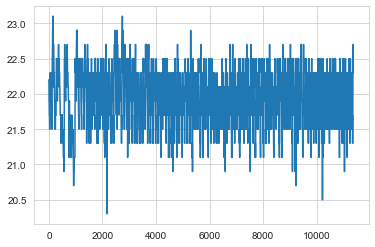

In [38]:
function = hol_df['t_hol'].plot(x ='index', y='t_hol', kind = 'line')

**Kolumna zawiera informacje JAK SZYBKO zmienia się temperatura. Wartość ilorazu różniczkowego `[f(x0+h)−f(x0)]/h` dla `h=1`. Inaczej mózwiąc jest to współczynnik kierunkowy prostej stycznej do punktu `x0`. Im większa wartość współczynnika - tym temperatura zmienia się szybciej**

In [39]:
hol_df['t(x+1)-t(x)'] = hol_df['t_hol'].diff()
hol_df['t(x+1)-t(x)']=hol_df['t(x+1)-t(x)'].fillna(0)

**Informacje o tabeli zmian temperatur**

In [40]:
hol_df['t(x+1)-t(x)'].describe()

count    11370.000000
mean         0.000009
std          0.103594
min         -1.800000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.400000
Name: t(x+1)-t(x), dtype: float64

**Jeżeli współczynnik kierunkowy stycznej > 0 to:
`1 -temperatura jest rosnąca`, 
w przeciwnym wypadku - `0`**

In [41]:
hol_df['t_rosnąca?']=np.where(hol_df['t(x+1)-t(x)'] > 0.0, 1, 0)

**Ile mamy wyników gdzie temperatura jest rosnąca**

In [42]:
x=hol_df[hol_df['t_rosnąca?']>0.0]
x.count()

time           1297
tryb_hol       1297
g_hol          1297
sp_hol         1297
t_hol          1297
przegrzanie    1297
T(t)-T(Sp)     1297
t_rosnąca?     1297
t(x+1)-t(x)    1297
Np_grz         1297
dtype: int64

**Zmiana danych w DataFrame na numeryczne**

In [43]:
hol_df=hol_df.apply(pd.to_numeric, errors='coerce')

**Wypełnianie NaN jeśli istnieją**

In [44]:
hol_df=hol_df.fillna(0)

**Reset indeks**

In [45]:
hol_df.reset_index(inplace=True)

**Niepotrzebne grzanie - gdy T pokoju > Sp, a pomimo tego dalej jest włączony grzejnik**

In [46]:
hol_df['Np_grz']=np.where((hol_df['przegrzanie'] > 0) & (hol_df['g_hol'] > 0), 1 ,0)

**Łączenie df zawierającej informacje o danym pokoju (hol) z informacjami o czynnikach zewnętrznych - po to, aby modele mogły rozważyć więcej czynników i ewentualnie rozpoznać znaczące korelacje między danymi**

In [47]:
left= hol_df
right = inne_df
hol_inne_df = pd.merge_asof(left,right,on=['time'])

**Zmiana typów danych w nowo powstałym df na numeryczne (aby zlikwidować błędu przy uczeniu maszynowym modeli)**

In [48]:
hol_inne_df=hol_inne_df.apply(pd.to_numeric, errors='coerce')

**Usuwanie NaN**

In [49]:
hol_inne_df.dropna(axis=0, inplace=True)

**Reset indeksu**

In [50]:
hol_inne_df.reset_index(drop=True, inplace=True)

**Usuwanie kolumny index (ponieważ się zdublowała)**

In [51]:
hol_inne_df=hol_inne_df.drop(['index'], axis=1)

**Infromacje - jak widać teraz wszystkie kolumny mają wartość numeryczną**

In [52]:
hol_inne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11369 entries, 0 to 11368
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11369 non-null  int64  
 1   tryb_hol         11369 non-null  int64  
 2   g_hol            11369 non-null  int64  
 3   sp_hol           11369 non-null  float64
 4   t_hol            11369 non-null  float64
 5   przegrzanie      11369 non-null  int32  
 6   T(t)-T(Sp)       11369 non-null  float64
 7   t_rosnąca?       11369 non-null  int32  
 8   t(x+1)-t(x)      11369 non-null  float64
 9   Np_grz           11369 non-null  int32  
 10  blok_g           11369 non-null  float64
 11  t_zew            11369 non-null  float64
 12  cis_atm          11369 non-null  float64
 13  czujnik_deszczu  11369 non-null  float64
 14  wiglotnosc       11369 non-null  float64
dtypes: float64(9), int32(3), int64(3)
memory usage: 1.2 MB


### DataFrame `hol_df` po wszystkich obróbkach:

In [53]:
hol_df

,index,time,tryb_hol,g_hol,sp_hol,t_hol,przegrzanie,T(t)-T(Sp),t_rosnąca?,t(x+1)-t(x),Np_grz
0,0,1601164800218000000,3,0,7.0,22.2,1,15.2,0,0.0,0
1,1,1601165700233000000,3,0,7.0,22.2,1,15.2,0,0.0,0
2,2,1601166600251000000,3,0,7.0,21.9,1,14.9,0,-0.3,0
3,3,1601167500267000000,3,0,7.0,21.9,1,14.9,0,0.0,0
4,4,1601168400294000000,3,0,7.0,21.9,1,14.9,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11365,11365,1611222300982000000,1,0,22.0,22.5,1,0.5,0,0.0,0
11366,11366,1611223200999000000,1,0,22.0,22.5,1,0.5,0,0.0,0
11367,11367,1611224100018000000,1,0,22.0,22.5,1,0.5,0,0.0,0
11368,11368,1611225000037000000,1,0,22.0,22.3,1,0.3,0,-0.2,0


**Wyniki, dla których istnieje efekt "Niepotrzebne grzanie"**

In [54]:
hol_df[hol_df['Np_grz']>0.0]

,index,time,tryb_hol,g_hol,sp_hol,t_hol,przegrzanie,T(t)-T(Sp),t_rosnąca?,t(x+1)-t(x),Np_grz
113,113,1601263800882000000,1,1,21.5,21.7,1,0.2,0,0.0,1
1317,1317,1602300600675000000,1,1,21.5,21.7,1,0.2,0,0.0,1
1917,1917,1602819000651000000,1,1,21.5,21.7,1,0.2,0,0.0,1
2617,2617,1603510200658000000,1,1,21.5,21.7,1,0.2,0,0.0,1
2909,2909,1603773000790000000,1,1,21.5,21.7,1,0.2,0,0.0,1
4285,4285,1604982600880000000,1,1,21.5,21.7,1,0.2,0,0.0,1
6584,6584,1607004000937000000,1,1,7.0,20.9,1,13.9,0,0.0,1
7132,7132,1607488200589000000,1,1,21.5,21.7,1,0.2,0,0.0,1
7823,7823,1608093000989000000,1,1,21.5,21.7,1,0.2,0,0.0,1
7921,7921,1608179400836000000,1,1,21.5,21.7,1,0.2,0,0.0,1


# Uczenie maszynowe modeli

In [55]:
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
#import tensorflow as tf
#from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
#import modułów
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# 1. Przewidywanie temperatury w pokoju: hol

**Celem predykcji będą wartosci z kolumny: `t_hol`, dane inputowe to reszta kolumn**

In [56]:
temp_y = hol_inne_df['t_hol']

**Aby uzyskać wiarygodne wyniki przewidywania temperatury usuniemy z danych treningowych  kolumny, które zbyt oczywiście wskazują na to, jaka będzie temperatura. Czyli usuwamy kolumny: `t_hol`, `t(x+1)-t(x)` - zmiana temperatury, `T(t)-T(Sp)` - różnica między temp pokoju i Setpointem**

In [57]:
temp_x = hol_inne_df.drop(['t_hol','t_rosnąca?','T(t)-T(Sp)','t(x+1)-t(x)'], axis=1)

**Podział na zbiór testowy i treningowy**

In [58]:
train_x, test_x, train_y, test_y = train_test_split(temp_x, temp_y, test_size=0.2, random_state=0)

## 1.1 LinearRegression

#### Przewidywanie temperatury w pokoju: hol

**Trenowanie modelu**

In [59]:
model = LinearRegression()
model.fit(train_x, train_y)

lin_pred = model.predict((test_x))
print("WYNIKI: ")
print("rMSE: ", np.sqrt(np.mean((lin_pred - test_y) ** 2)))
print("r2_score: ", r2_score(lin_pred, test_y))

wyniks = pd.DataFrame({'prawdziwa': test_y,
                       'predykcja': lin_pred,
                       'roznica': (test_y - lin_pred)})

WYNIKI: 
rMSE:  0.3422135894820936
r2_score:  -1.3747250697264328


In [60]:
wyniks

,prawdziwa,predykcja,roznica
10603,22.3,21.919758,0.380242
2118,22.3,22.278815,0.021185
4936,21.9,22.123722,-0.223722
2164,20.9,22.249528,-1.349528
5124,22.1,22.168915,-0.068915
...,...,...,...
7467,22.1,21.967351,0.132649
415,21.9,21.976201,-0.076201
6800,21.9,22.030209,-0.130209
7900,21.1,21.692629,-0.592629


## 1.2 DecisionTreeRegressor

#### Przewidywanie temperatury w pokoju: hol

In [61]:
regressor = DecisionTreeRegressor(random_state=5)
regressor.fit(train_x, train_y)

tree_pred = regressor.predict(test_x)
print("WYNIKI: ")
print("rMSE: ", np.sqrt(np.mean((tree_pred - test_y) ** 2)))
print("r2_score: ", r2_score(tree_pred, test_y))

wyniks2 = pd.DataFrame({'prawdziwe': test_y,
                        'predykcja': tree_pred,
                        'roznica': (test_y - tree_pred)})



WYNIKI: 
rMSE:  0.10493537819622868
r2_score:  0.9296127565345559


In [62]:
wyniks2

,prawdziwe,predykcja,roznica
10603,22.3,22.3,0.000000e+00
2118,22.3,22.5,-2.000000e-01
4936,21.9,21.9,0.000000e+00
2164,20.9,20.7,2.000000e-01
5124,22.1,22.3,-2.000000e-01
...,...,...,...
7467,22.1,22.1,3.552714e-15
415,21.9,21.9,0.000000e+00
6800,21.9,21.9,-3.552714e-15
7900,21.1,21.1,0.000000e+00


## 1.3.1 RandomForestRegressor

#### Przewidywanie temperatury w pokoju: hol

In [63]:
regr = RandomForestRegressor(max_depth=30, random_state=0, n_estimators=100)
regr.fit(train_x, train_y)

forest_pred = regr.predict(test_x)
print("WYNIKI: ")
print("rMSE: ", np.sqrt(np.mean((forest_pred - test_y) ** 2)))
print("r2_score: ", r2_score(forest_pred, test_y))

wyniks3 = pd.DataFrame({'prawdziwe': test_y,
                        'predykcja': forest_pred,
                        'roznica': (test_y - forest_pred)})


WYNIKI: 
rMSE:  0.09105526715725455
r2_score:  0.9447055450236677


In [64]:
wyniks3

,prawdziwe,predykcja,roznica
10603,22.3,22.321200,-0.021200
2118,22.3,22.528000,-0.228000
4936,21.9,21.835350,0.064650
2164,20.9,21.052000,-0.152000
5124,22.1,22.262800,-0.162800
...,...,...,...
7467,22.1,22.102000,-0.002000
415,21.9,21.938000,-0.038000
6800,21.9,21.834000,0.066000
7900,21.1,21.185333,-0.085333


### 1.3.2 Przewidywanie temperatury w pokoju: gabinet (dane treningowe z holu)

**Celem predykcji będą wartosci z kolumny: `t_gabinet`, dane inputowe to reszta kolumn**

In [65]:
temp_y = gabinet_df['t_gabinet']

**Aby uzyskać wiarygodne wyniki przewidywania temperatury usuniemy z danych treningowych  kolumny, które zbyt oczywiście wskazują na to, jaka będzie temperatura. Czyli usuwamy kolumny: `t_hol`, `t(x+1)-t(x)` - zmiana temperatury, `T(t)-T(Sp)` - różnica między temp pokoju i Setpointem**

In [66]:
temp_x = hol_inne_df.drop(['t_hol','t_rosnąca?','T(t)-T(Sp)','t(x+1)-t(x)'], axis=1)

**Podział na zbiór testowy i treningowy**

In [67]:
train_x, test_x, train_y, test_y = train_test_split(temp_x, temp_y, test_size=0.2, random_state=0)

**Trenowanie modelu**

In [68]:
regr = RandomForestRegressor(max_depth=30, random_state=0, n_estimators=100)
regr.fit(train_x, train_y)

forest_predd = regr.predict(test_x)
print("WYNIKI: ")
print("rMSE: ", np.sqrt(np.mean((forest_predd - test_y) ** 2)))
print("r2_score: ", r2_score(forest_predd, test_y))

wyniks4 = pd.DataFrame({'prawdziwe': test_y,
                        'predykcja': forest_predd,
                        'roznica': (test_y - forest_predd)})


WYNIKI: 
rMSE:  0.1253145019538007
r2_score:  0.9152926121589327


In [69]:
wyniks4

,prawdziwe,predykcja,roznica
10603,21.8,21.856888,-0.056888
2118,21.4,21.896124,-0.496124
4936,21.8,21.797371,0.002629
2164,20.0,20.376000,-0.376000
5124,22.2,22.191516,0.008484
...,...,...,...
7467,22.0,22.043099,-0.043099
415,21.8,21.772000,0.028000
6800,22.0,21.990044,0.009956
7900,21.6,21.700000,-0.100000


# 2. Przewidywanie ZMIANY temperatury w pokoju: hol

**Celem predykcji będą wartosci z kolumny: `t(x+1)-t(x)`, dane inputowe to reszta kolumn**

In [70]:
temp_y2 = hol_inne_df['t(x+1)-t(x)']
temp_x2 = hol_inne_df.drop('t(x+1)-t(x)', axis=1)

**Podział na zbiór testowy i treningowy**

In [71]:
train_x, test_x, train_y, test_y = train_test_split(temp_x2, temp_y2, test_size=0.2, random_state=4)

## 2.1 LinearRegression

#### Przewidywanie ZMIANY temperatury w pokoju: hol

**Trenowanie modelu**

In [72]:
model = LinearRegression()
model.fit(train_x, train_y)

lin_pred2 = model.predict((test_x))
print("WYNIKI: ")
print("rMSE: ", np.sqrt(np.mean((lin_pred2 - test_y) ** 2)))
print("r2_score: ", r2_score(lin_pred2, test_y))

wynik1 = pd.DataFrame({'prawdziwa': test_y,
                       'predykcja': lin_pred2,
                       'roznica': (test_y - lin_pred2)})

WYNIKI: 
rMSE:  0.10124080427184173
r2_score:  -25.98507442809259


In [73]:
wynik1

,prawdziwa,predykcja,roznica
7484,0.0,0.016901,-0.016901
11234,0.0,-0.023480,0.023480
7332,0.0,0.012848,-0.012848
2121,0.0,0.011554,-0.011554
944,0.0,-0.024392,0.024392
...,...,...,...
1927,0.0,0.016263,-0.016263
9830,0.0,0.015108,-0.015108
10868,0.0,0.020719,-0.020719
3314,0.0,0.012460,-0.012460


## 2.2 DecisionTreeRegressor

#### Przewidywanie ZMIANY temperatury w pokoju: hol

**Trenowanie modelu**

In [74]:
regressor = DecisionTreeRegressor(random_state=5)
regressor.fit(train_x, train_y)

tree_pred2 = regressor.predict(test_x)
print("WYNIKI: ")
print("rMSE: ", np.sqrt(np.mean((tree_pred2 - test_y) ** 2)))
print("r2_score: ", r2_score(tree_pred2, test_y))

wynik2 = pd.DataFrame({'prawdziwe': test_y,
                        'predykcja': tree_pred2,
                        'roznica': (test_y - tree_pred2)})



WYNIKI: 
rMSE:  0.0916716637320302
r2_score:  -0.010458218166285782


In [75]:
wynik2

,prawdziwe,predykcja,roznica
7484,0.0,0.0,0.0
11234,0.0,0.0,0.0
7332,0.0,0.0,0.0
2121,0.0,0.0,0.0
944,0.0,0.0,0.0
...,...,...,...
1927,0.0,0.0,0.0
9830,0.0,0.0,0.0
10868,0.0,0.0,0.0
3314,0.0,0.0,0.0


## 2.3 RandomForestRegressor

#### Przewidywanie ZMIANY temperatury w pokoju: hol

**Trenowanie modelu**

In [76]:
regr = RandomForestRegressor(max_depth=10, random_state=4, n_estimators=3)
regr.fit(train_x, train_y)

forest_pred3 = regr.predict(test_x)
print("WYNIKI: ")
print("rMSE: ", np.sqrt(np.mean((forest_pred3 - test_y) ** 2)))
print("r2_score: ", r2_score(forest_pred3, test_y))

wynik3= pd.DataFrame({'prawdziwe': test_y,
                        'predykcja': forest_pred3,
                        'roznica': (test_y - forest_pred3)})


WYNIKI: 
rMSE:  0.07348188938672096
r2_score:  0.10608489062122184


In [77]:
wynik3

,prawdziwe,predykcja,roznica
7484,0.0,-0.028375,0.028375
11234,0.0,-0.036468,0.036468
7332,0.0,-0.001852,0.001852
2121,0.0,-0.000963,0.000963
944,0.0,-0.006978,0.006978
...,...,...,...
1927,0.0,0.000000,0.000000
9830,0.0,-0.028375,0.028375
10868,0.0,-0.000709,0.000709
3314,0.0,-0.005152,0.005152


# 3. Przewidywanie kiedy nastąpi przegrzanie w pokoju: hol

## 3.1 LogisticRegression

In [78]:
dane_y = hol_inne_df['przegrzanie']
dane_x = hol_inne_df.drop(['t_hol','przegrzanie','T(t)-T(Sp)','Np_grz'] , axis=1)

train_x, test_x, train_y, test_y = train_test_split(dane_x, dane_y, test_size=0.2, random_state=0)

**W przypadku modeli klasyfikujących dobrą praktyką jest standaryzacja danych:**

In [79]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train_x)
x_test_scaled = scaler.fit_transform(test_x)

**Trenowanie modelu**

In [80]:
lg = LogisticRegression(C=20, max_iter=1000)
lg.fit(x_train_scaled,train_y)
acc_lg_sc= lg.score(x_test_scaled, test_y)
print("WYNIKI: ")
print("acc: ", acc_lg_sc)

WYNIKI: 
acc:  0.7546174142480211


**Tabela zawierająca informacje o wynikach `false negative` oraz `false positive`**

In [81]:
pred_y = lg.predict(x_test_scaled)
print(metrics.confusion_matrix(test_y,pred_y))

[[ 270  484]
 [  74 1446]]


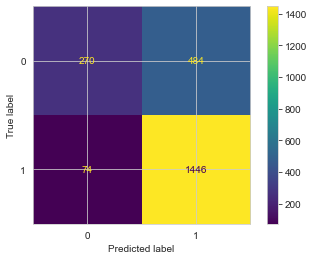

In [82]:
plot_confusion_matrix(lg, x_test_scaled, test_y)
plt.show()

**Ocena znaczenia poszczególnych cech**

Cecha nr: 0, Score: 0.05563
Cecha nr: 1, Score: -0.14666
Cecha nr: 2, Score: -1.81288
Cecha nr: 3, Score: 4.55570
Cecha nr: 4, Score: -0.11515
Cecha nr: 5, Score: 0.41525
Cecha nr: 6, Score: 7.04942
Cecha nr: 7, Score: 0.31662
Cecha nr: 8, Score: 0.01306
Cecha nr: 9, Score: -0.04195
Cecha nr: 10, Score: -0.88945


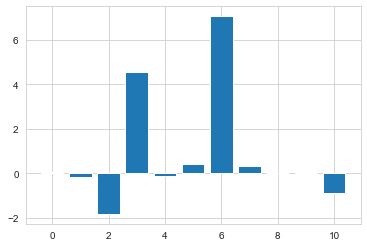

In [83]:
importance = lg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Cecha nr: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [84]:
hol_inne_df.drop(['t_hol','przegrzanie','T(t)-T(Sp)','Np_grz'],axis=1)

,time,tryb_hol,g_hol,sp_hol,t_rosnąca?,t(x+1)-t(x),blok_g,t_zew,cis_atm,czujnik_deszczu,wiglotnosc
0,1601165700233000000,3,0,7.0,0,0.0,1.0,11.8,1001.0,0.0,87.0
1,1601166600251000000,3,0,7.0,0,-0.3,1.0,11.6,1001.0,0.0,86.0
2,1601167500267000000,3,0,7.0,0,0.0,1.0,11.6,1001.0,0.0,87.0
3,1601168400294000000,3,0,7.0,0,0.0,1.0,11.5,1001.0,0.0,87.0
4,1601169300309000000,3,0,7.0,0,0.0,1.0,11.5,1001.0,0.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...
11364,1611222300982000000,1,0,22.0,0,0.0,0.0,-1.9,1019.0,0.0,100.0
11365,1611223200999000000,1,0,22.0,0,0.0,0.0,-1.9,1019.0,0.0,100.0
11366,1611224100018000000,1,0,22.0,0,0.0,0.0,-1.9,1019.0,0.0,100.0
11367,1611225000037000000,1,0,22.0,0,-0.2,0.0,-1.9,1019.0,0.0,100.0


**Wnioski:**

Cel projektu został częściowo osiągnięty. Szczegółowa analiza danych pozwoliła zbadać korelację pomiędzy wartosciami ze zbiorów danych i przerobić dane w odpowiedni sposób, który umożliwia wytrenowanie modeli uczenia maszynowego. Wytrenowane modele przewidują w lepszy lub gorszy sposób temperaturę w danym pokoju, zmianę temperatury, fakt czy w pokoju nastąpi przegrzanie (czyli wzrost temperatury pokoju powyżej zadanego poziomu).

Efekty projektu sugerują kilka podstawowych rozwiązań, które można zastosować, aby zlikwidować fakt zbyt wysokiego wzrostu temperatury. Pierwszym z nich jest operowanie na SetPointcie danego pokoju, w zależności od przewidywanych temperatur. Można połączyć wyniki z wszystkich modeli użytych w projekcie i zmieniać wartości SetPointa. Kolejnym rozwiązaniem jest operowanie na blokadzie grzejników w danym pokoju lub blokadzie ogrzewania. W podobny sposób, można zmodyfikować układ grzewczy, aby blokował grzejniki, gdy efekt "niepotrzebne grzanie" występuje. Ostatnim rozwiązaniem może być połączenie dwóch ostatnich rozwiązań bazując na szybkości zmiany temperatury. Jeśli wykryjemy, że przyrost temperatury jest wzglednie wysoki możemy założyć, że ogrzewanie powinno być wyłączone odpowiednio szybciej.
